# CODING TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND IMPORT LIBRARIES/DATASETS

- In this hands-on project, we will train a multiple linear regression model to predict the price of used cars.
- This project can be used by car dealerships to predict used car prices and understand the key factors that contribute to used car prices.
- Features (inputs): 
    - Make 
    - Model
    - Type
    - Origin 
    - Drivetrain
    - Invoice
    - EngineSize
    - Cylinders
    - Horsepower
    - MPG_City
    - MPG_Highway
    - Weight
    - Wheelbase
    - Length
- Outputs: MSRP (Price)



In [1]:
# Import Numpy and check the version
import numpy as np
print(np.__version__)

1.26.4


In [2]:
# Import Pandas and check the version
import pandas as pd
print(pd.__version__)

2.2.2


In [3]:
# Updgrade Numpy version
!pip3 install numpy --upgrade

In [4]:
# Updgrade Pandas version
!pip3 install pandas --upgrade

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # Interactive Data Visualization

In [6]:
# Read the CSV file 
car_df = pd.read_csv("used_car_price.csv")

In [7]:
# Load the top 6 instances
car_df.head(6)

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,46100,3.5,6,225,18,24,3893,115,197


In [8]:
# Load the bottom 6 instances 
car_df.tail(6)

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
422,Volvo,S80 2.5T 4dr,Sedan,Europe,All,37885,2.5,5,194,20,27,3691,110,190
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,2.4,5,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,2.3,5,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,2.9,6,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,1.9,4,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,35145,2.5,5,208,20,27,3823,109,186


In [9]:
# Display the feature columns
car_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')

In [10]:
# Check the shape of the dataframe
car_df.shape

(428, 14)

In [11]:
# Check if any missing values are present in the dataframe
car_df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [12]:
car_df = car_df.dropna()

In [13]:
car_df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
EngineSize     float64
Cylinders        int64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [14]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   EngineSize   428 non-null    float64
 7   Cylinders    428 non-null    int64  
 8   Horsepower   428 non-null    int64  
 9   MPG_City     428 non-null    int64  
 10  MPG_Highway  428 non-null    int64  
 11  Weight       428 non-null    int64  
 12  Wheelbase    428 non-null    int64  
 13  Length       428 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 46.9+ KB


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **What is the maximum price of the used car?**
- **What is the minimum price of the used car?**

In [15]:
car_df.describe()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,3.196729,5.799065,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,1.108595,1.559679,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [16]:
car_df['MSRP'].max()

192465

In [17]:
car_df['MSRP'].min()

10280

# CODING TASK #2: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION - PART #1

<Axes: >

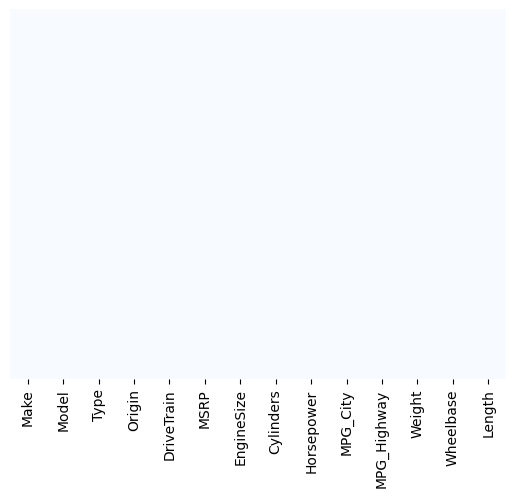

In [18]:
# check if there are any Null values
sns.heatmap(car_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [19]:
car_df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
EngineSize     float64
Cylinders        int64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

<Axes: xlabel='Horsepower', ylabel='MSRP'>

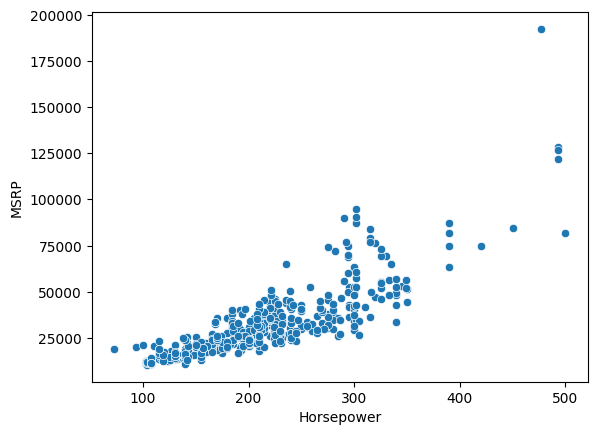

In [20]:
sns.scatterplot(x = 'Horsepower', y = 'MSRP', data = car_df)

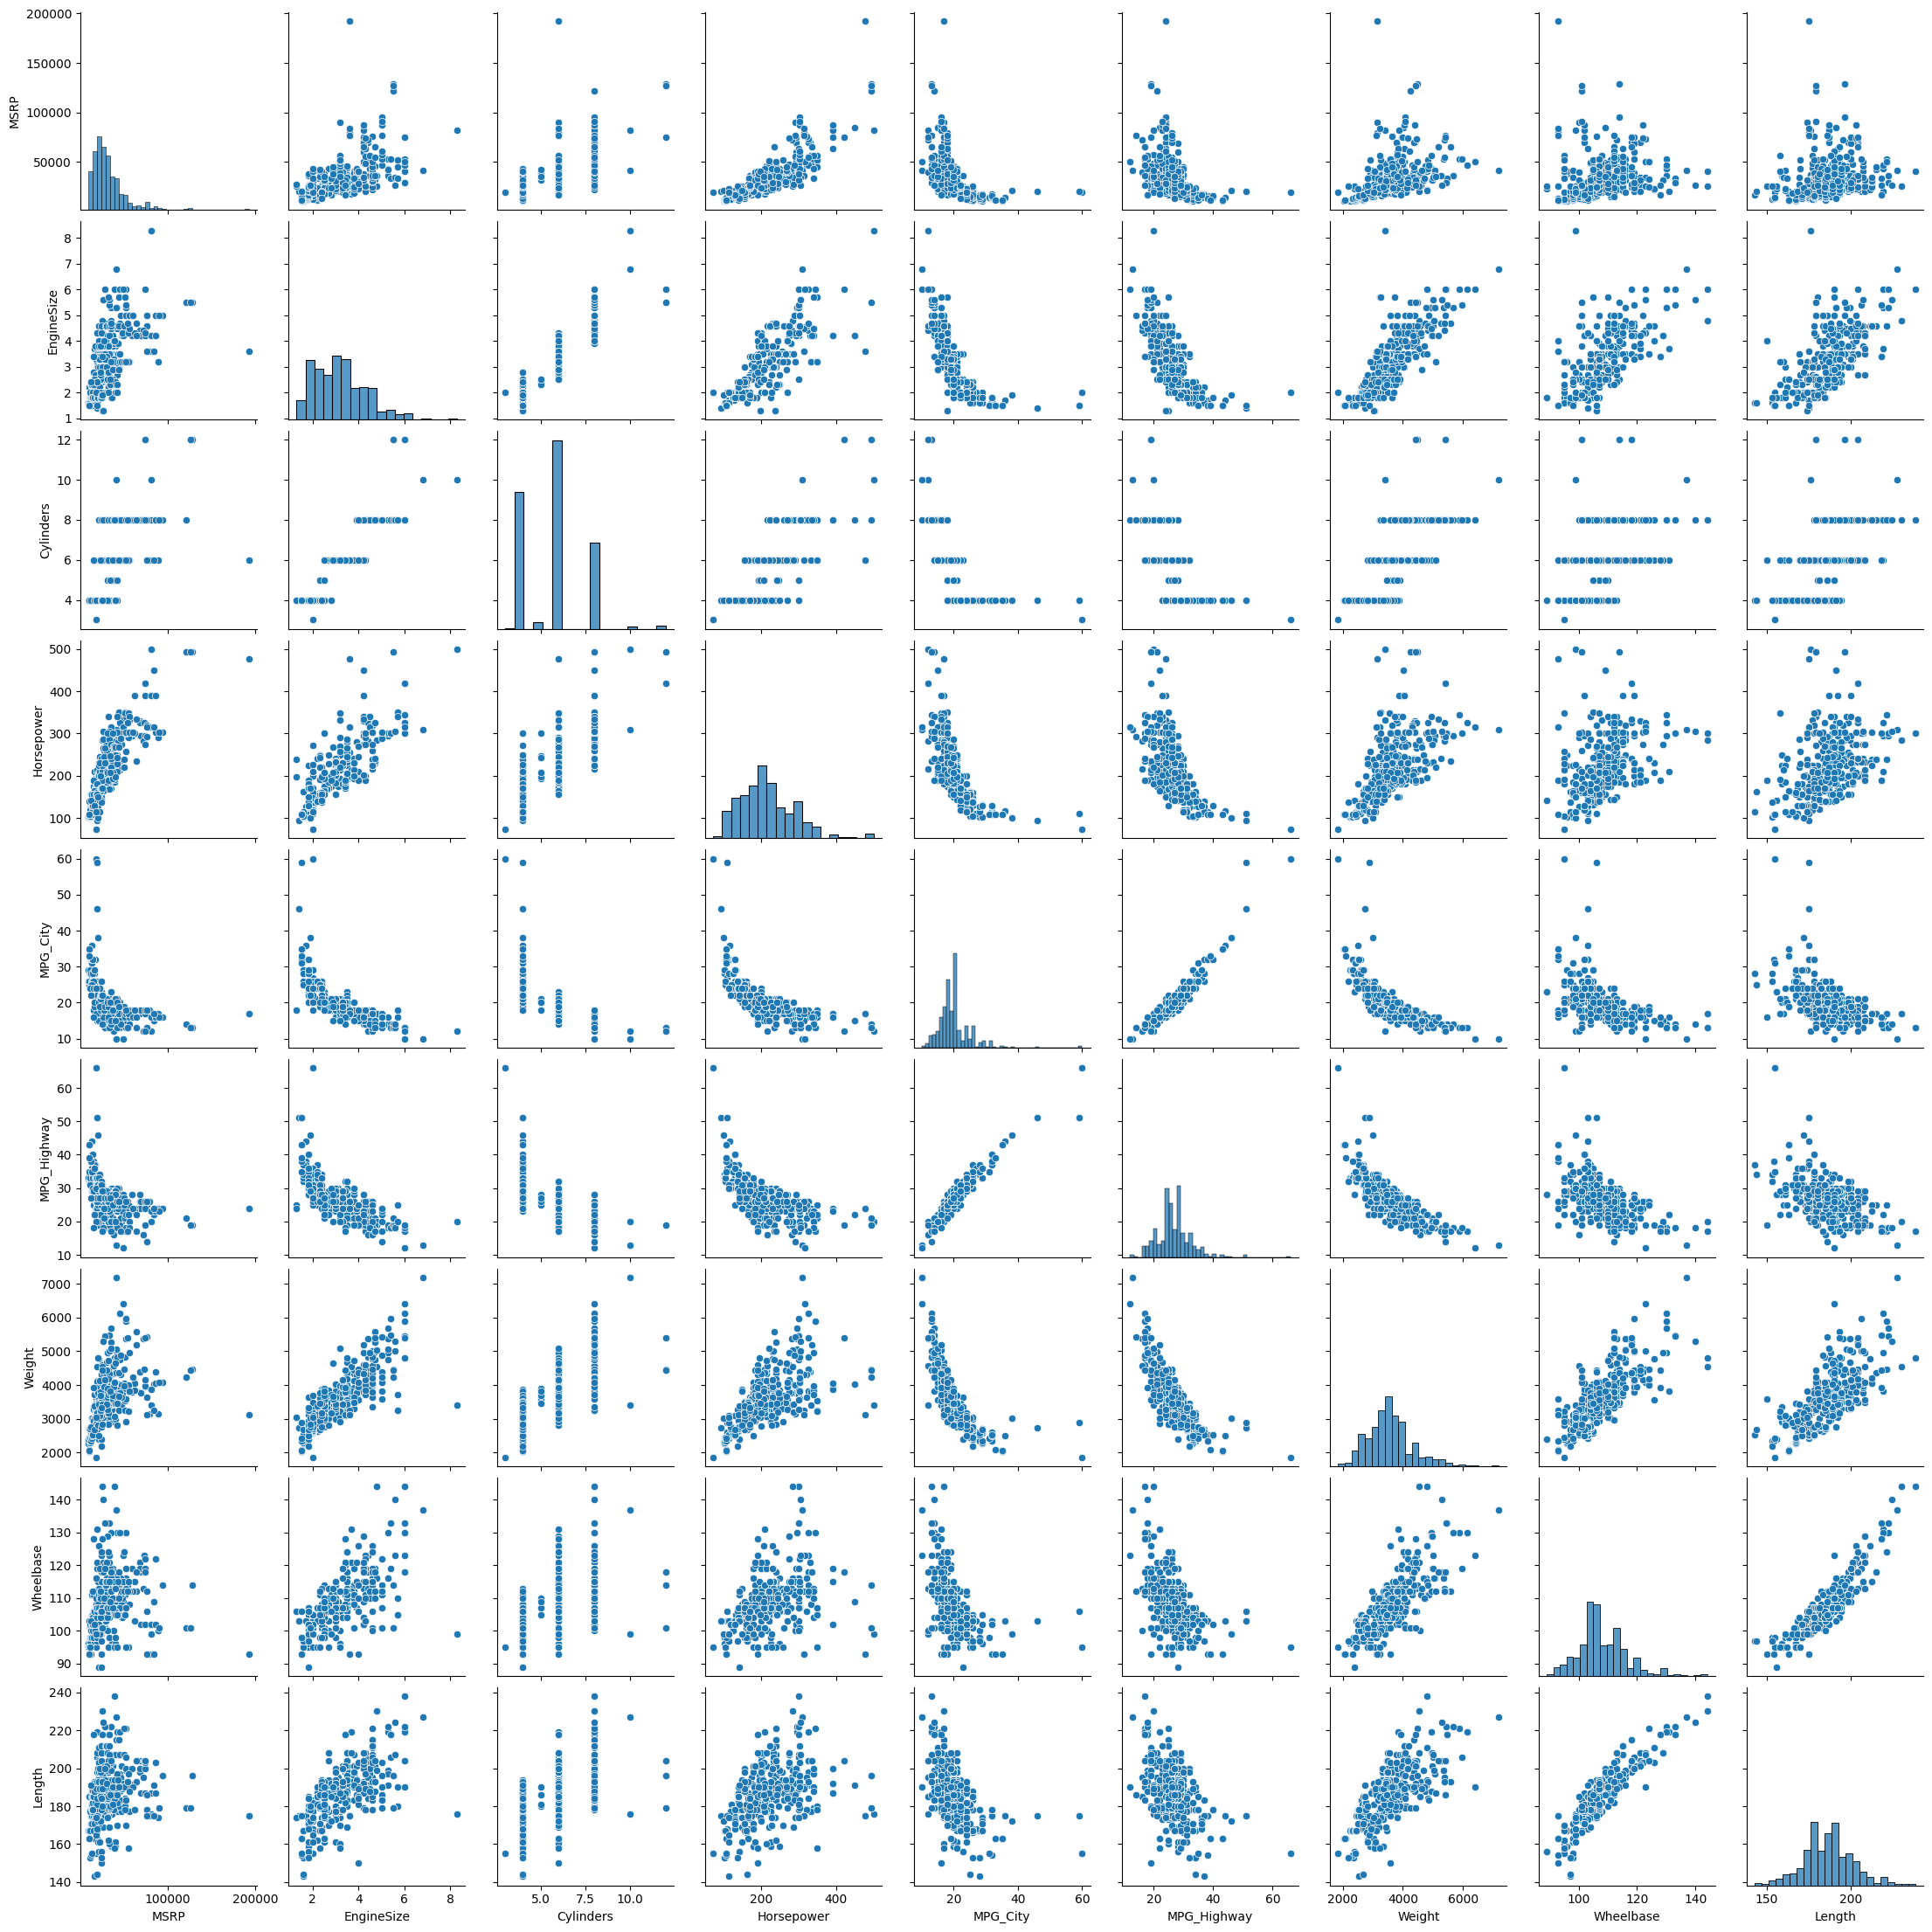

In [21]:
# scatterplots for joint relationships and histograms for univariate distributions
sns.pairplot(car_df) 


In [22]:
# Let's view various makes of the cars
car_df.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

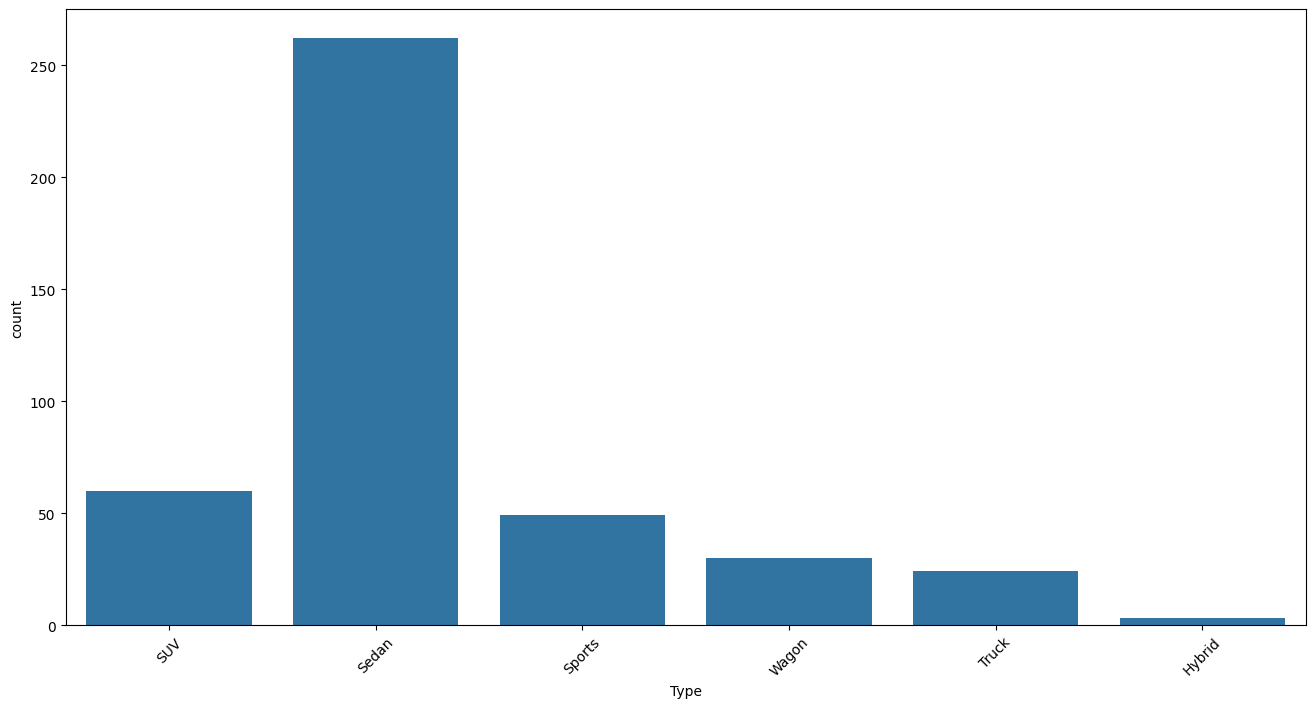

In [23]:
plt.figure(figsize = (16, 8))
sns.countplot(x = car_df['Type'])
locs, labels = plt.xticks();
plt.setp(labels, rotation = 45);

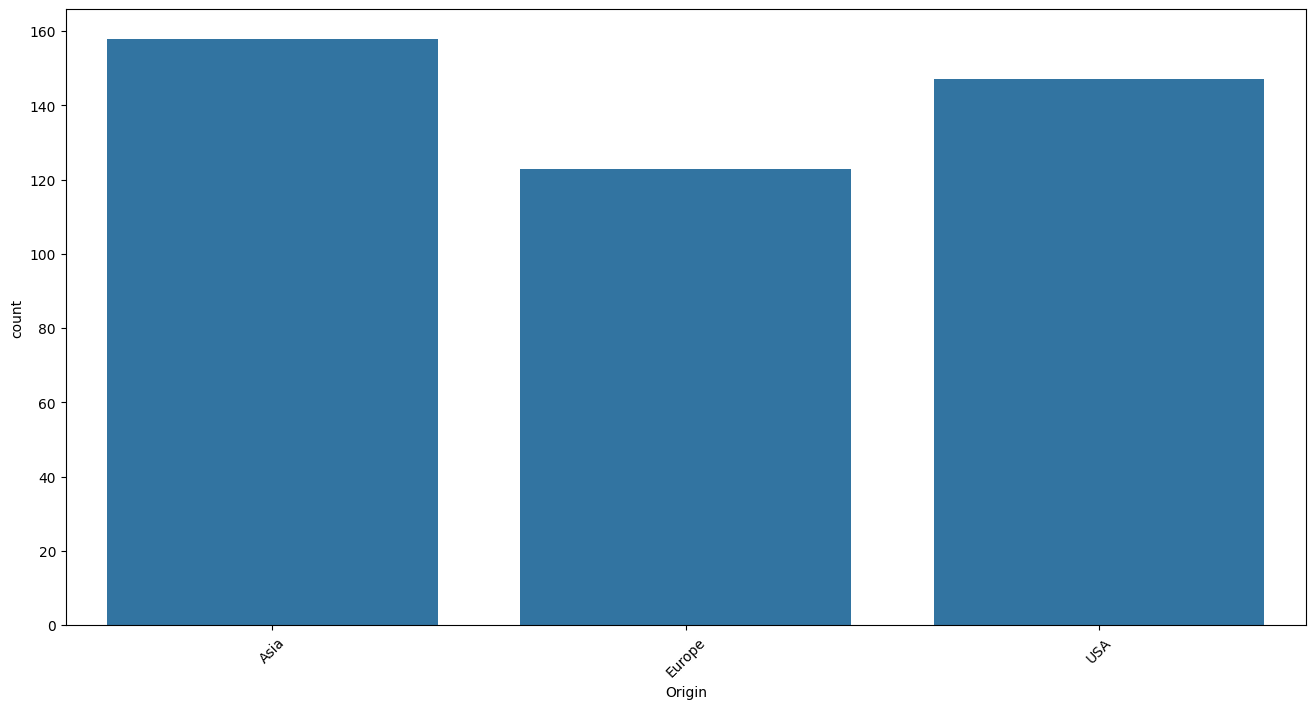

In [24]:
plt.figure(figsize = (16, 8))
sns.countplot(x = car_df['Origin'])
locs, labels = plt.xticks();
plt.setp(labels, rotation = 45);

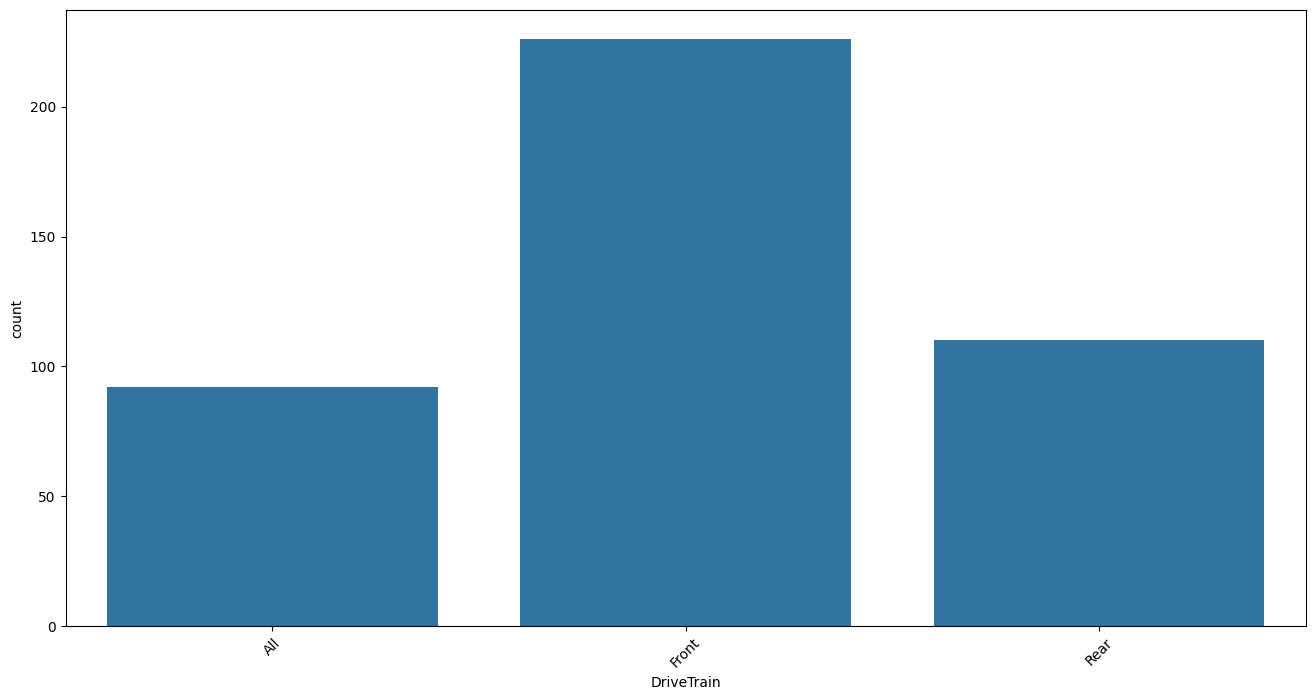

In [25]:
plt.figure(figsize = (16, 8))
sns.countplot(x = car_df['DriveTrain'])
locs, labels = plt.xticks();
plt.setp(labels, rotation = 45);

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **List all unique car makes in the dataset**
- **Using Seaborn, plot the countplot for the vehicle Make?**
- **List the top 3 brands?**

In [26]:
car_df

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,2.4,5,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,2.3,5,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,2.9,6,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,1.9,4,170,22,29,2822,101,180


In [27]:
car_df['Make'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

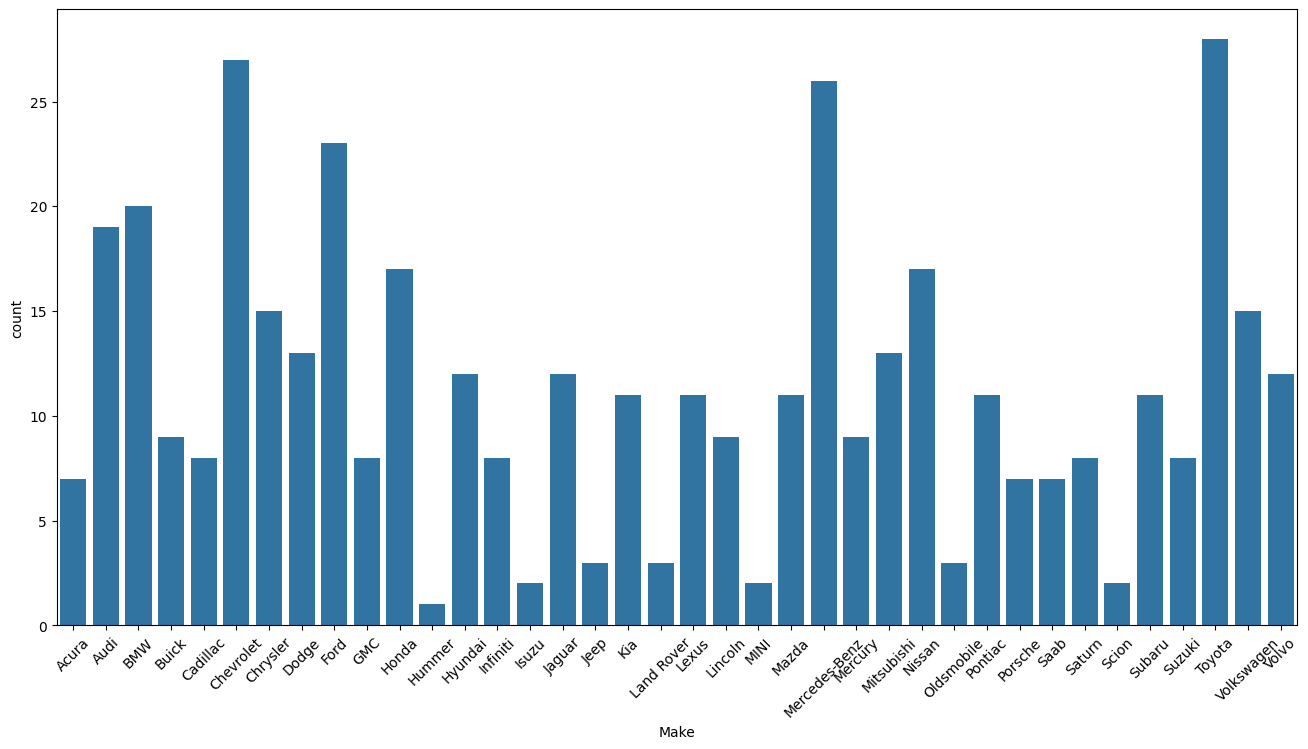

In [28]:
plt.figure(figsize = (16, 8))
sns.countplot(x = car_df['Make'])
locs, labels = plt.xticks();
plt.setp(labels, rotation = 45);

# CODING TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION - PART #2

In [29]:
!pip install wordcloud
# Let's view the model of all used cars using WordCloud generator
from wordcloud import WordCloud, STOPWORDS

In [30]:
car_df

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,2.4,5,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,2.3,5,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,2.9,6,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,1.9,4,170,22,29,2822,101,180


In [31]:
text = car_df.Model.values

In [32]:
stopwords = set(STOPWORDS)

In [33]:
from wordcloud import WordCloud

In [34]:
wc = WordCloud(background_color = "blue", max_words = 200, max_font_size = 100, random_state = 5, 
              stopwords = stopwords, contour_width = 3).generate(str(text))  

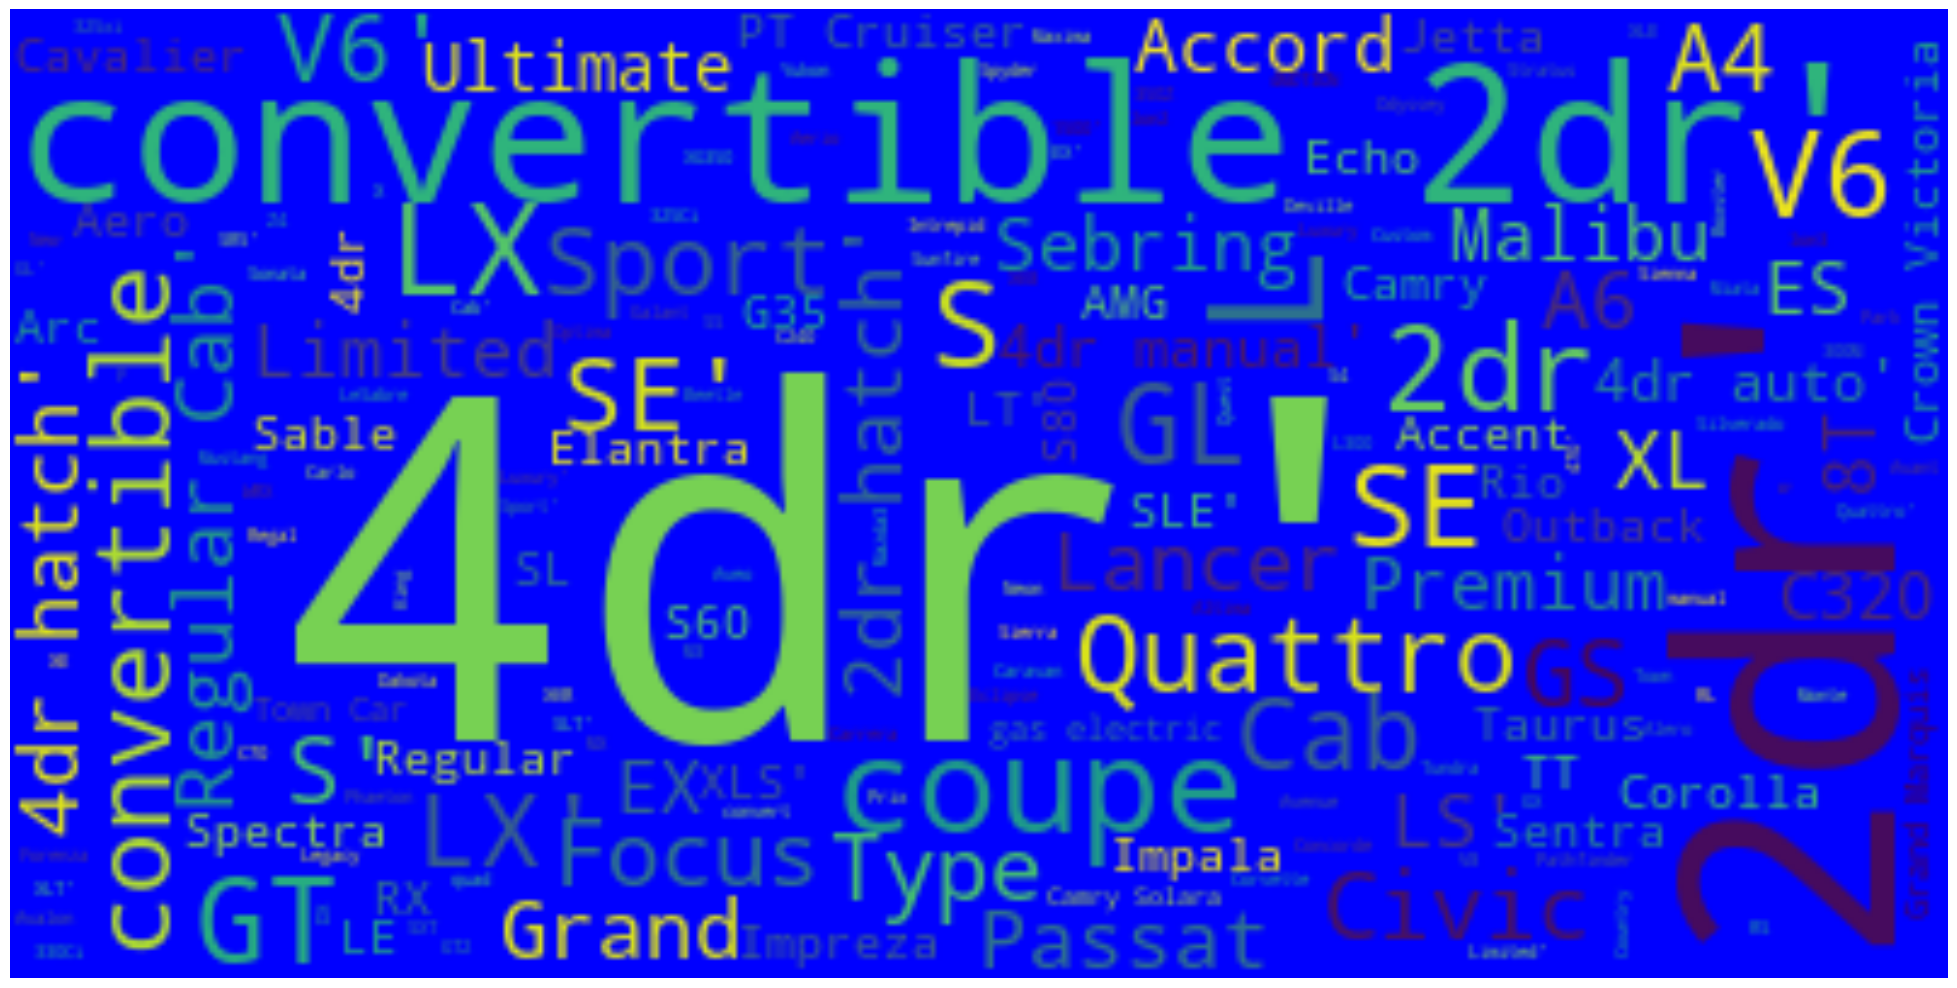

In [35]:
fig = plt.figure(figsize = (25, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Plot the correlation matrix**
- **Comment on the correlation matrix, which feature has the highest positive correlation with MSRP?**

In [36]:
numeric_df = car_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                 MSRP  EngineSize  Cylinders  Horsepower  MPG_City  \
MSRP         1.000000    0.571753   0.649308    0.826945 -0.475020   
EngineSize   0.571753    1.000000   0.908186    0.787435 -0.709471   
Cylinders    0.649308    0.908186   1.000000    0.807523 -0.679872   
Horsepower   0.826945    0.787435   0.807523    1.000000 -0.676699   
MPG_City    -0.475020   -0.709471  -0.679872   -0.676699  1.000000   
MPG_Highway -0.439622   -0.717302  -0.671488   -0.647195  0.941021   
Weight       0.448426    0.807867   0.742849    0.630796 -0.737966   
Wheelbase    0.152000    0.636517   0.546337    0.387398 -0.507284   
Length       0.172037    0.637448   0.549785    0.381554 -0.501526   

             MPG_Highway    Weight  Wheelbase    Length  
MSRP           -0.439622  0.448426   0.152000  0.172037  
EngineSize     -0.717302  0.807867   0.636517  0.637448  
Cylinders      -0.671488  0.742849   0.546337  0.549785  
Horsepower     -0.647195  0.630796   0.387398  0.381554  
MPG_City 

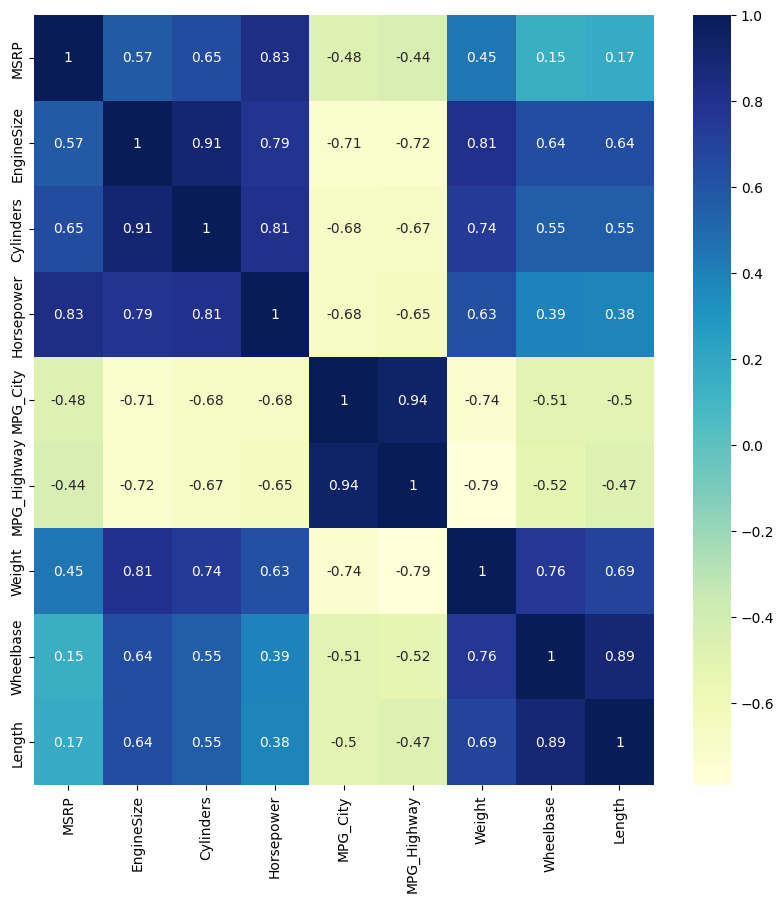

In [37]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot = True);

# CODING TASK #4: PREPARE THE DATA BEFORE MODEL TRAINING

In [38]:
car_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197


In [39]:
# Perform One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"
car_df = pd.get_dummies(car_df, columns=["Make", "Model", "Type", "Origin", "DriveTrain"])

In [40]:
car_df.head()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,3.5,6,265,17,23,4451,106,189,True,...,False,False,False,False,True,False,False,True,False,False
1,23820,2.0,4,200,24,31,2778,101,172,True,...,True,False,False,False,True,False,False,False,True,False
2,26990,2.4,4,200,22,29,3230,105,183,True,...,True,False,False,False,True,False,False,False,True,False
3,33195,3.2,6,270,20,28,3575,108,186,True,...,True,False,False,False,True,False,False,False,True,False
4,43755,3.5,6,225,18,24,3880,115,197,True,...,True,False,False,False,True,False,False,False,True,False


In [41]:
# Feeding input features to X and output (MSRP) to y
X = car_df.drop("MSRP", axis = 1)
y = car_df["MSRP"]

In [42]:
X = np.array(X)

In [43]:
y = np.array(y)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.25)

In [45]:
X_train.shape

(321, 483)

In [46]:
X_test.shape

(107, 483)

**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
- **Perform train test split without indicating a test_size, what do you conclude?**

In [47]:
X_train,y_train,X_test,y_test = train_test_split(X,y)

In [48]:
X_train.shape

(321, 483)

In [49]:
y_train.shape

(107, 483)

# CODING TASK #5: TRAIN AND TEST A LINEAR REGRESSION MODEL IN SK-LEARN (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.25)

In [52]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [53]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.5606503730859697

In [54]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [55]:
y_predict

array([42159.52432031,  7037.43528925, 24819.27584639, 51844.78271828,
       48997.44044527, 23707.20627588, 49088.48209749, 58945.03896738,
       36277.14542103, 62874.41223052,  9412.90413107, 26394.41495148,
       29448.22601263, 28574.02985677, 39500.29012639, 50169.28186598,
       14100.45553823, 30705.51016286, 43801.10262125, 41064.74114817,
       65583.35436521, 46174.60788571, 94480.4981022 , 43761.03692613,
       19057.97286082, 41204.33502311, 76386.1712456 , 35133.05102429,
       13238.80516047, 65882.01055695, 32314.98182158, 33499.94020964,
       32472.83178849, 41204.33502311, 47287.91371045, 10980.06915432,
       12383.1715765 , 13834.01804007,  8379.6032138 , 39496.1845836 ,
       19300.74091458, 33767.35789537,  8252.42706769, 28783.48653495,
       49637.52666125, 53969.62423087, 31317.67483745, 37904.38530624,
       23280.79246536, 15110.9354753 , 10931.61628618, 43203.91029021,
       47224.45924021, 39240.63551181, 10513.0647626 , 39996.49174141,
      

In [56]:
k = 13 # List the number of independant variables
k

13

In [57]:
n = len(X_test)
n

107

In [58]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-( (1-r2)*(n-1) / (n-k-1))

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 8766.521 
MSE = 76851895.38976234 
MAE = 6140.655374398891 
R2 = 0.5606503730859697 
Adjusted R2 = 0.4992359091087396


(array([34., 41., 22.,  8.,  2.]),
 array([10539. , 23805.2, 37071.4, 50337.6, 63603.8, 76870. ]),
 <BarContainer object of 5 artists>)

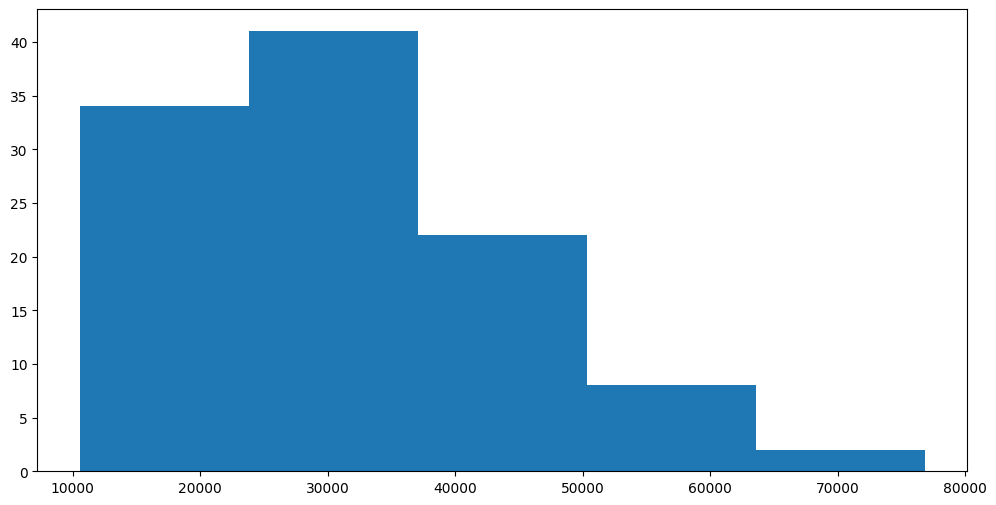

In [68]:
# Visualize how accurate predictions are relative to y_test
plt.figure(figsize = (12, 6))
plt.hist(y_test, bins=5)